In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv('data.csv')
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [92]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [93]:
cat

['Education_Level',
 'Occupation',
 'Location',
 'Marital_Status',
 'Employment_Status',
 'Homeownership_Status',
 'Type_of_Housing',
 'Gender',
 'Primary_Mode_of_Transportation']

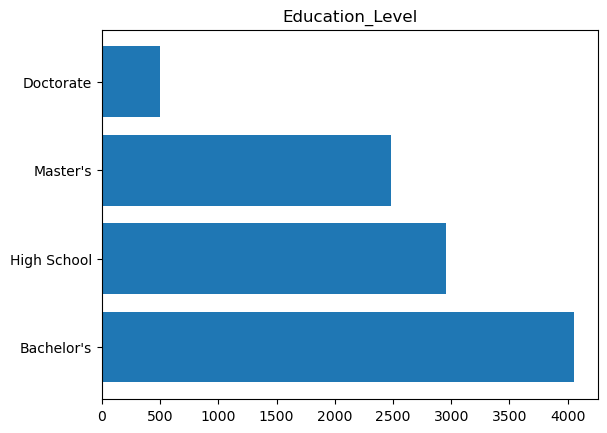

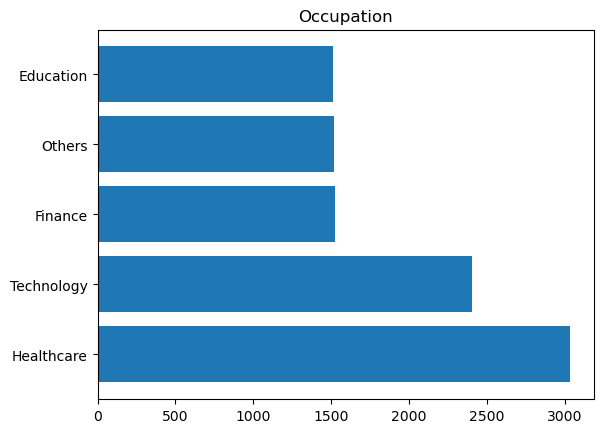

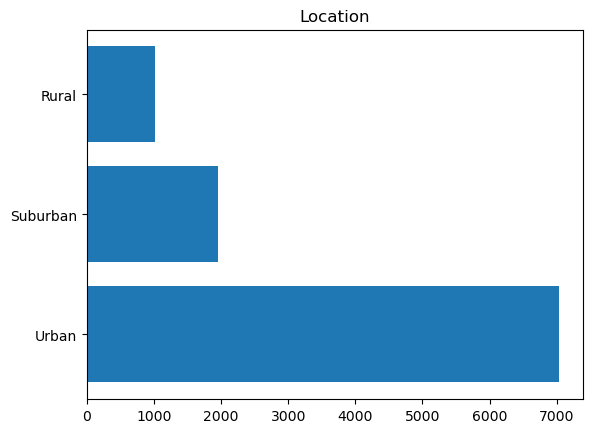

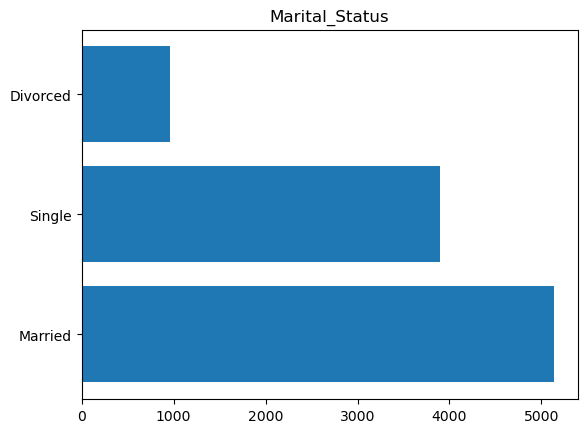

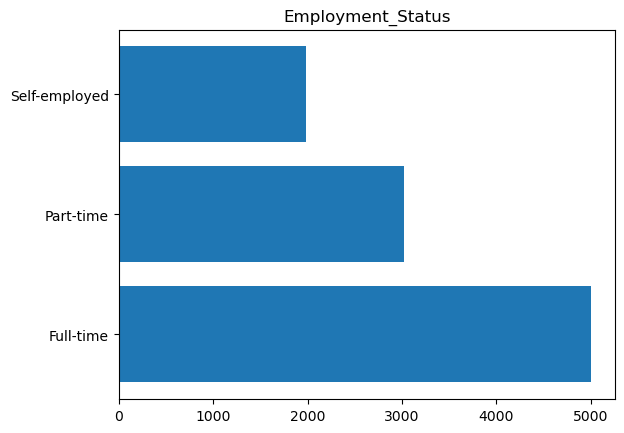

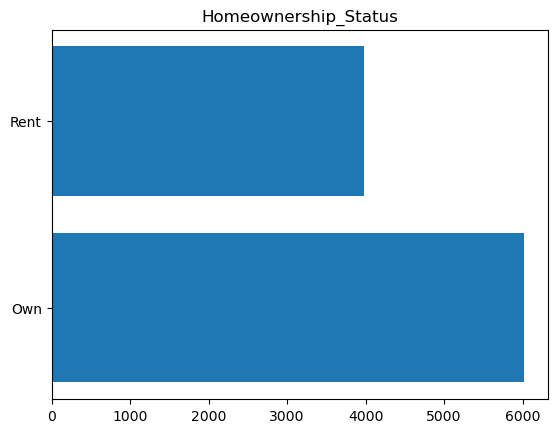

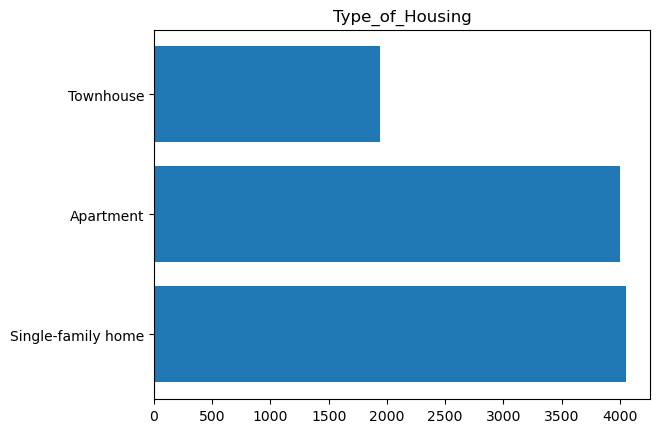

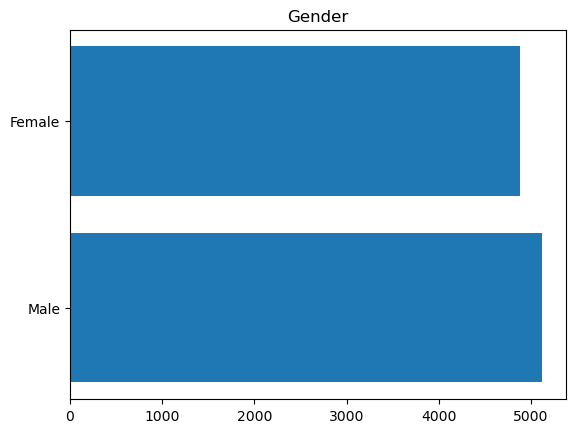

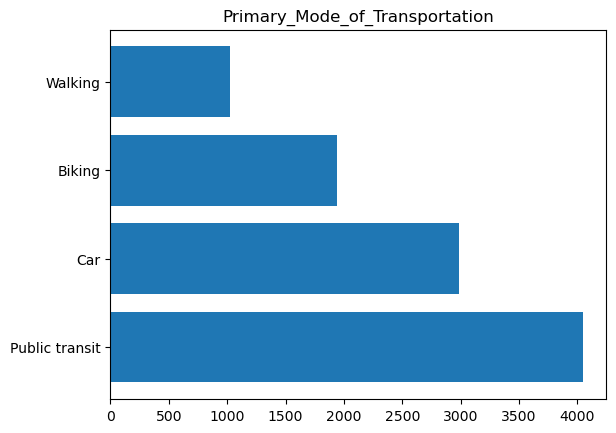

In [94]:
for i in cat:
    vc=df[i].value_counts()
    plt.barh(y=vc.index,width=vc)
    plt.title(i)
    plt.show()

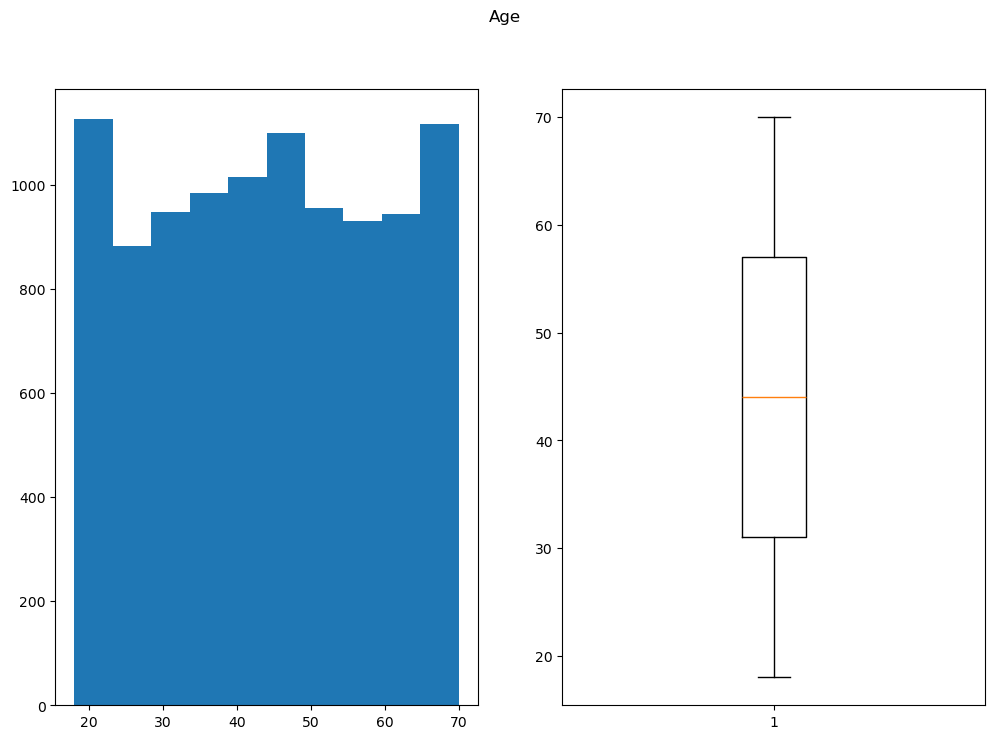

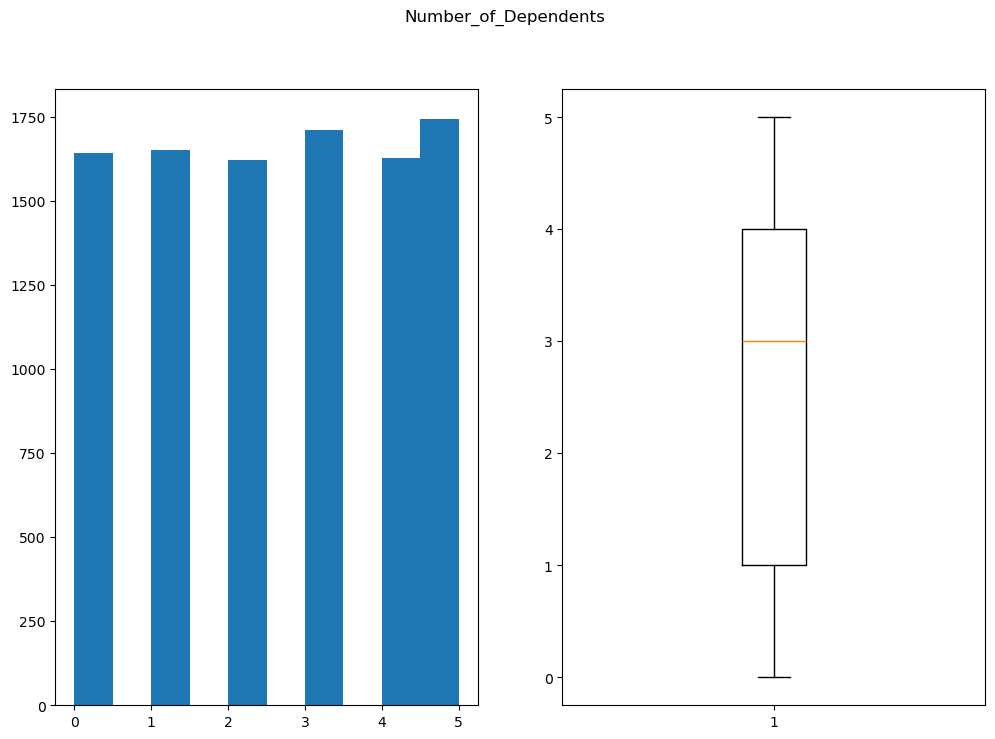

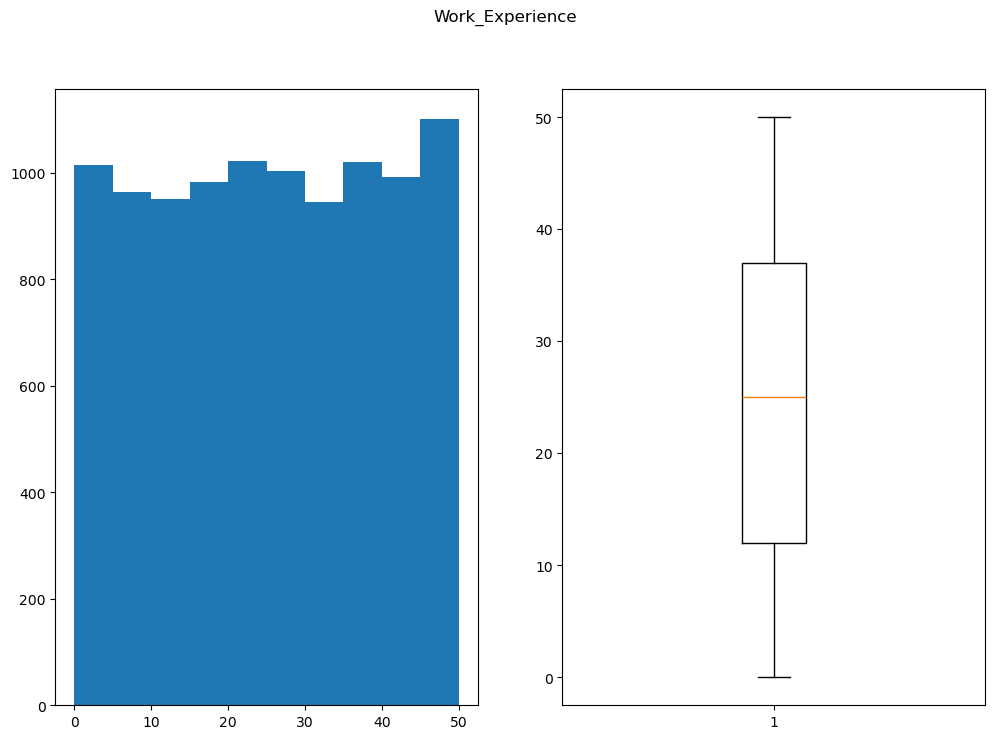

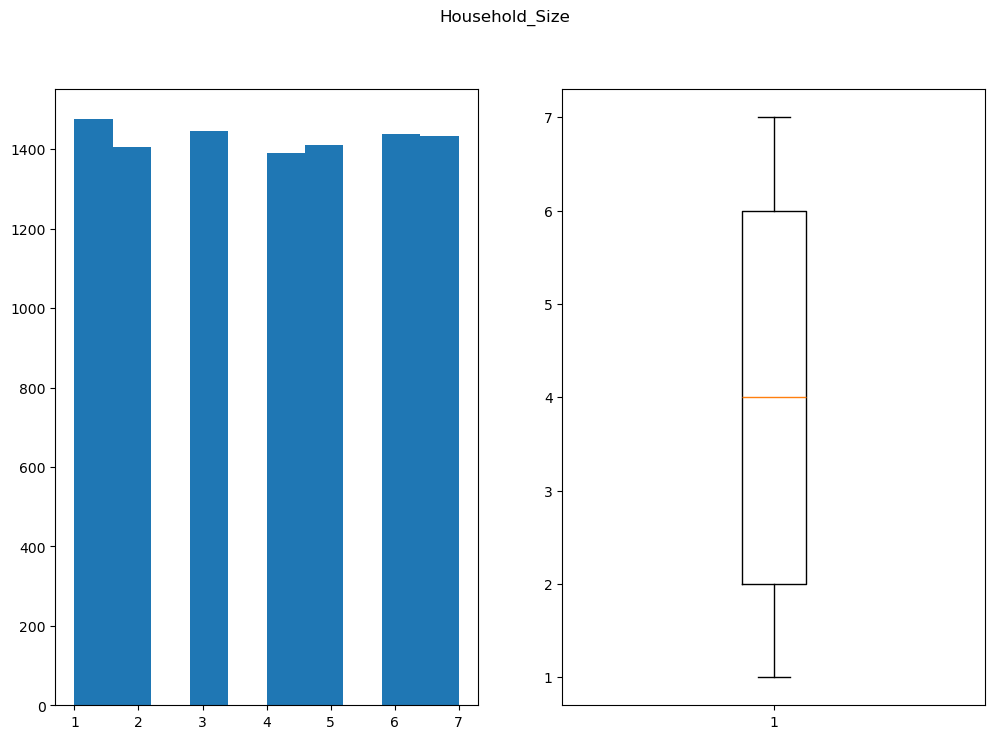

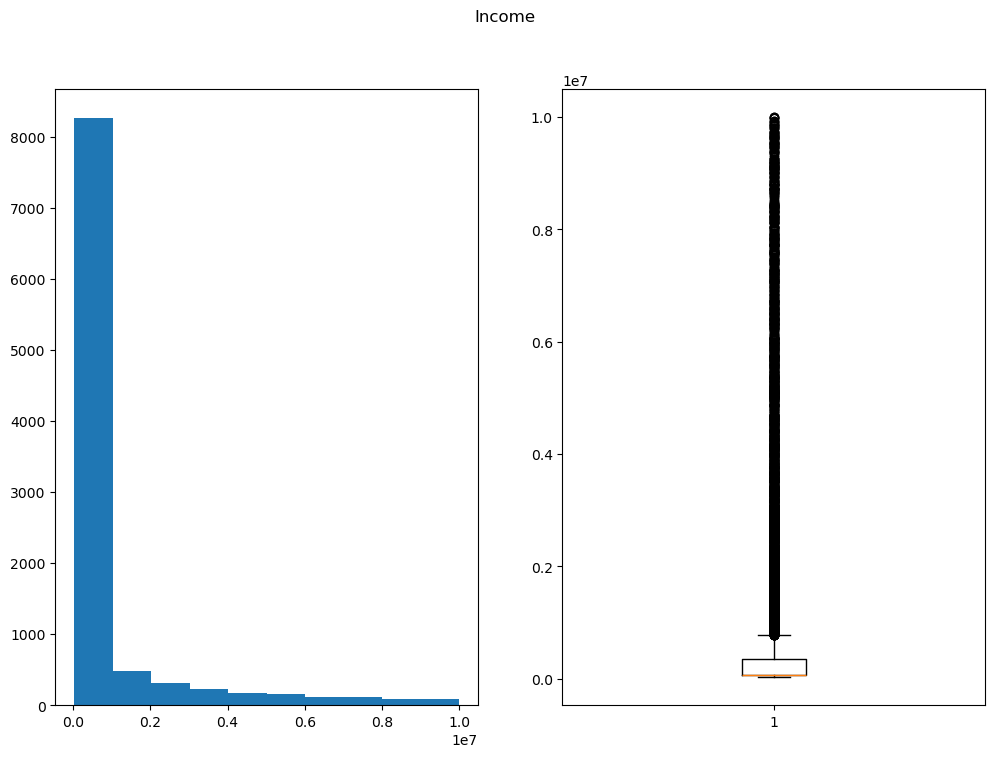

In [95]:
for i in num:
    fig,ax=plt.subplots(1,2,figsize=(12,8))
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

In [96]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [97]:
df['Education_Level'].value_counts()

Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64

In [98]:
df['Education_Level'].replace(to_replace=['High School',"Bachelor's","Master's","Doctorate"],
                              value=[0,1,2,3],inplace=True)

In [99]:
df['Occupation'].value_counts()

Occupation
Healthcare    3035
Technology    2407
Finance       1525
Others        1521
Education     1512
Name: count, dtype: int64

In [100]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [101]:
ohe_occupation=OneHotEncoder(sparse_output=False)
occ_arr=ohe_occupation.fit_transform(df[['Occupation']])
occup=pd.DataFrame(occ_arr,columns=ohe_occupation.categories_)

In [102]:
occup=occup.iloc[:,1:]

In [103]:
cat

['Education_Level',
 'Occupation',
 'Location',
 'Marital_Status',
 'Employment_Status',
 'Homeownership_Status',
 'Type_of_Housing',
 'Gender',
 'Primary_Mode_of_Transportation']

In [104]:
df['Location'].value_counts()

Location
Urban       7037
Suburban    1951
Rural       1012
Name: count, dtype: int64

In [105]:
df['Location'].replace(to_replace=['Urban',"Suburban","Rural"],value=[2,1,0],inplace=True)

In [106]:
df['Marital_Status'].value_counts()

Marital_Status
Married     5136
Single      3900
Divorced     964
Name: count, dtype: int64

In [107]:
ohe_ms=OneHotEncoder(sparse_output=False)
ms_arr=ohe_ms.fit_transform(df[['Marital_Status']])
ms=pd.DataFrame(ms_arr,columns=ohe_ms.categories_)
ms= ms.iloc[:,1:]
ms

,Married,Single
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,1.0
9998,1.0,0.0


In [108]:
df['Employment_Status'].value_counts()

Employment_Status
Full-time        5004
Part-time        3016
Self-employed    1980
Name: count, dtype: int64

In [109]:
ohe_es=OneHotEncoder(sparse_output=False)
es=ohe_es.fit_transform(df[['Employment_Status']])
es=pd.DataFrame(es,columns=ohe_es.categories_)
es= es.iloc[:,1:]
es

,Part-time,Self-employed
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [110]:
df['Homeownership_Status'].value_counts()

Homeownership_Status
Own     6018
Rent    3982
Name: count, dtype: int64

In [111]:
le= LabelEncoder()
df['Homeownership_Status']= le.fit_transform(df['Homeownership_Status'])

In [112]:
df['Type_of_Housing'].value_counts()

Type_of_Housing
Single-family home    4055
Apartment             4001
Townhouse             1944
Name: count, dtype: int64

In [113]:
ohe_th=OneHotEncoder(sparse_output=False)
th=ohe_th.fit_transform(df[['Type_of_Housing']])
th=pd.DataFrame(th,columns=ohe_th.categories_)
th= th.iloc[:,1:]
th

,Single-family home,Townhouse
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,1.0
9996,1.0,0.0
9997,1.0,0.0
9998,1.0,0.0


In [114]:
df['Gender']= le.fit_transform(df['Gender'])

In [115]:
df['Primary_Mode_of_Transportation'].value_counts()

Primary_Mode_of_Transportation
Public transit    4047
Car               2986
Biking            1940
Walking           1027
Name: count, dtype: int64

In [116]:
ohe_pm=OneHotEncoder(sparse_output=False)
pm=ohe_pm.fit_transform(df[['Primary_Mode_of_Transportation']])
pm=pd.DataFrame(pm,columns=ohe_pm.categories_)
pm= pm.iloc[:,1:]
pm

,Car,Public transit,Walking
0,0.0,1.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,0.0,0.0,0.0
9997,0.0,1.0,0.0
9998,0.0,0.0,0.0


In [117]:
cat

['Education_Level',
 'Occupation',
 'Location',
 'Marital_Status',
 'Employment_Status',
 'Homeownership_Status',
 'Type_of_Housing',
 'Gender',
 'Primary_Mode_of_Transportation']

In [118]:
X=df.drop(['Occupation','Marital_Status','Type_of_Housing','Employment_Status','Primary_Mode_of_Transportation','Income'],axis=1)
X

,Age,Education_Level,Number_of_Dependents,Location,Work_Experience,Household_Size,Homeownership_Status,Gender
0,56,2,5,2,21,7,0,1
1,69,0,0,2,4,7,0,1
2,46,1,1,2,1,7,0,0
3,32,0,2,2,32,1,0,0
4,60,1,3,2,15,4,0,1
...,...,...,...,...,...,...,...,...
9995,58,0,0,1,26,6,0,0
9996,23,2,3,2,16,1,0,0
9997,41,3,3,2,50,4,0,0
9998,44,0,0,2,3,1,0,1


In [119]:
X=pd.concat([X,pm,th,es,ms,occup],axis=1)
X

,Age,Education_Level,Number_of_Dependents,Location,Work_Experience,Household_Size,Homeownership_Status,Gender,"(Car,)","(Public transit,)",...,"(Single-family home,)","(Townhouse,)","(Part-time,)","(Self-employed,)","(Married,)","(Single,)","(Finance,)","(Healthcare,)","(Others,)","(Technology,)"
0,56,2,5,2,21,7,0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,69,0,0,2,4,7,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,46,1,1,2,1,7,0,0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,32,0,2,2,32,1,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60,1,3,2,15,4,0,1,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,0,0,1,26,6,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,23,2,3,2,16,1,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,41,3,3,2,50,4,0,0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9998,44,0,0,2,3,1,0,1,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [120]:
y=df['Income']
y

0         72510
1         75462
2         71748
3         74520
4        640210
         ...   
9995      74994
9996      72676
9997    2684820
9998      57955
9999    1131084
Name: Income, Length: 10000, dtype: int64

In [121]:
# np array conversion for fast work
X=X.values
y=y.values

In [122]:
!pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.0 MB 1.5 MB/s eta 0:04:13
   ---------------------------------------- 0.1/385.0 MB 1.5 MB/s eta 0:04:13
   ---------------------------------------- 0.2/385.0 MB 1.2 MB/s eta 0:05:28
   ---------------------------------------- 0.3/385.0 MB 1.4 MB/s eta 0:04:44
   ---------------------------------------- 0.5/385.0 MB 1.9 MB/s eta 0:03:20
   ---------------------------------------- 0.7/385.0 MB 2.2 MB/s eta 0:02:52
   ---------------------------------------- 1.0/385.0 MB 2.8 MB/s eta 0:02:16
   ---------------------------------------- 1.6/385.0 MB 4.0 MB/s eta 0:01:36
  

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [129]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [130]:
model=Sequential()

In [131]:
model.add(Dense(128,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

C:\Users\komal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [135]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3947475501056.0000 - mae: 811303.7500 - val_loss: 3973282267136.0000 - val_mae: 805679.3750
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3473156866048.0000 - mae: 895132.0625 - val_loss: 3468493062144.0000 - val_mae: 1162547.3750
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3392681541632.0000 - mae: 1161948.8750 - val_loss: 3468069437440.0000 - val_mae: 1124427.8750
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3346605539328.0000 - mae: 1125979.1250 - val_loss: 3461651628032.0000 - val_mae: 1135138.2500
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3371488509952.0000 - mae: 1139050.3750 - val_loss: 3458306932736.0000 - val_mae: 1134040.1250
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3292406743040.0000 - mae: 1123163.7500 - val_loss: 3456230227968.0000 - val_mae: 1128698.0000
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 294566730137

In [136]:
loss,mae=model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2430856855552.0000 - mae: 816916.6250


In [137]:
print('Error',mae)

Error 850592.5625


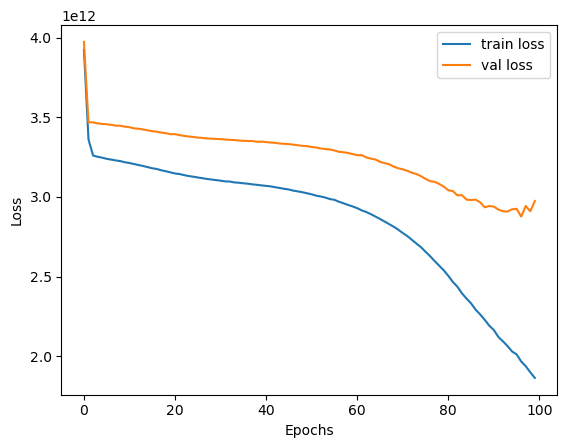

In [138]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()